In [15]:
# use R to change path to ~/cdai/SpliFi/analysis if current working path is not

setwd("~/cdai/SpliFi/analysis")


In [16]:
suppressMessages(library(tidyverse))
suppressMessages(library(glue))
suppressMessages(library(data.table))
suppressMessages(library(cowplot))

In [17]:
suppressMessages(library(furrr))
plan(multisession, workers = 6)

In [18]:
theme_set(theme_cowplot())

In [75]:
options(repr.plot.width = 8, repr.plot.height=6, repr.plot.res = 180)

In [19]:
splitFrac <- function(x) {
    x  <- str_split(x, "/")
    return(as.integer(map(x, ~.x[1])))
}

In [20]:
processDT <- function(dt) {
    chroms <- dt$chrom
    datacols <- names(dt)[-c(1)]
    dt <- dt[, -c('chrom')][, map(.SD, ~splitFrac(.x))]
    dt$chrom <- chroms
    dt$intron_type = str_extract(dt$chrom, '[FN]')
    dt$clu = str_extract(dt$chrom, 'clu_\\d+')
    dt[, clu_type := paste(unique(intron_type), collapse = ","), by = clu]
    cols <- c('chrom', 'clu', 'clu_type', 'intron_type', datacols)

    return(dt[, ..cols])

}

In [22]:
tissues = c('Brain_-_Cortex', 'Muscle', 'Kidney')
noise_by_intron_files = glue('../code/results/pheno/noisy/GTEx/{tissues}/leafcutter_perind.counts.noise_by_intron.gz')

In [23]:
noise_by_intron_files

../code/results/pheno/noisy/GTEx/Brain_-_Cortex/leafcutter_perind.counts.noise_by_intron.gz
../code/results/pheno/noisy/GTEx/Muscle/leafcutter_perind.counts.noise_by_intron.gz
../code/results/pheno/noisy/GTEx/Kidney/leafcutter_perind.counts.noise_by_intron.gz

In [24]:
introns = future_map(noise_by_intron_files, fread)

In [25]:
names(introns) <- c('Brain', 'Muscle', 'Kidney')

In [26]:
map(introns, dim)

$Brain
[1] 103113    256

$Muscle
[1] 95357   804

$Kidney
[1] 101844     89

In [27]:
# process each tissue data.table
introns = future_map(introns, processDT)

In [28]:
map(introns, dim)
map(introns, ~.x[1:3, 1:7])

$Brain
[1] 103113    259

$Muscle
[1] 95357   807

$Kidney
[1] 101844     92

chrom,clu,clu_type,intron_type,GTEX-1117F,GTEX-111FC,GTEX-1128S
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
chr1:779092:803918:clu_1_+:N,clu_1,N,N,0,1,0
chr1:804222:804775:clu_2_+:N,clu_2,N,N,1,0,1
chr1:804222:807216:clu_2_+:N,clu_2,N,N,0,0,0
chrom,clu,clu_type,intron_type,GTEX-1117F,GTEX-111CU,GTEX-111FC
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
chr1:804222:804775:clu_2_+:N,clu_2,N,N,2,0,0
chr1:804222:807216:clu_2_+:N,clu_2,N,N,0,0,0
chr1:829104:841199:clu_4_+:N,clu_4,N,N,5,9,2
chrom,clu,clu_type,intron_type,GTEX-11GS4,GTEX-11OF3,GTEX-11TTK


### geuvadis

In [ ]:
geuvadis = '../code/results/pheno/noisy/Geuvadis/EUR/leafcutter_wo_precluster_perind.counts.noise_by_intron.gz'

In [40]:
geuv = fread(geuvadis)

In [41]:
pryr::object_size(geuv)

1.53 GB

In [42]:
geuv[1:5, 1:10]

chrom,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1:779092:781936:clu_1_+:N,0/0,0/1,0/2,0/1,0/1,0/0,0/0,0/0,0/0
chr1:779092:786392:clu_1_+:N,0/0,0/1,0/2,0/1,0/1,0/0,0/0,0/0,0/0
chr1:779092:803918:clu_1_+:N,0/0,1/1,2/2,1/1,1/1,0/0,0/0,0/0,0/0
chr1:779092:803921:clu_1_+:N,0/0,0/1,0/2,0/1,0/1,0/0,0/0,0/0,0/0
chr1:779092:803950:clu_1_+:N,0/0,0/1,0/2,0/1,0/1,0/0,0/0,0/0,0/0


In [47]:
geuv.introns = processDT(geuv)

In [50]:
saveRDS(geuv.introns, "2023-11-09-Geuvadis-EUR-introns.rds")

In [52]:
geuv.introns[1:5, 1:20]
geuv.introns %>% names

chrom,clu,clu_type,intron_type,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,HG00108,HG00109,HG00110,HG00111,HG00112,HG00114
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
chr1:779092:781936:clu_1_+:N,clu_1,N,N,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
chr1:779092:786392:clu_1_+:N,clu_1,N,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
chr1:779092:803918:clu_1_+:N,clu_1,N,N,0,1,2,1,1,0,0,0,0,0,0,0,0,0,0,1
chr1:779092:803921:clu_1_+:N,clu_1,N,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
chr1:779092:803950:clu_1_+:N,clu_1,N,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


[1] "chrom"       "clu"         "clu_type"    "intron_type" "HG00096"    
  [6] "HG00097"     "HG00099"     "HG00100"     "HG00101"     "HG00102"    
 [11] "HG00103"     "HG00104"     "HG00105"     "HG00106"     "HG00108"    
 [16] "HG00109"     "HG00110"     "HG00111"     "HG00112"     "HG00114"    
 [21] "HG00115"     "HG00116"     "HG00117"     "HG00118"     "HG00119"    
 [26] "HG00120"     "HG00121"     "HG00122"     "HG00123"     "HG00124"    
 [31] "HG00125"     "HG00126"     "HG00127"     "HG00128"     "HG00129"    
 [36] "HG00130"     "HG00131"     "HG00132"     "HG00133"     "HG00134"    
 [41] "HG00135"     "HG00136"     "HG00137"     "HG00138"     "HG00139"    
 [46] "HG00141"     "HG00142"     "HG00143"     "HG00145"     "HG00146"    
 [51] "HG00148"     "HG00149"     "HG00150"     "HG00151"     "HG00152"    
 [56] "HG00154"     "HG00155"     "HG00156"     "HG00157"     "HG00158"    
 [61] "HG00159"     "HG00160"     "HG00171"     "HG00173"     "HG00174"    
 [66] "HG00176"     "HG00177"     "HG00178"     "HG00179"     "HG00180"    
 [71] "HG00181"     "HG00182"     "HG00183"     "HG00185"     "HG00186"    
 [76] "HG00187"     "HG00188"     "HG00189"     "HG00231"     "HG00232"    
 [81] "HG00233"     "HG00234"     "HG00235"     "HG00236"     "HG00238"    
 [86] "HG00239"     "HG00240"     "HG00242"     "HG00243"     "HG00244"    
 [91] "HG00245"     "HG00246"     "HG00247"     "HG00249"     "HG00250"    
 [96] "HG00251"     "HG00252"     "HG00253"     "HG00255"     "HG00256"    
[101] "HG00257"     "HG00258"     "HG00259"     "HG00260"     "HG00261"    
[106] "HG00262"     "HG00263"     "HG00264"     "HG00265"     "HG00266"    
[111] "HG00267"     "HG00268"     "HG00269"     "HG00271"     "HG00272"    
[116] "HG00273"     "HG00274"     "HG00275"     "HG00276"     "HG00277"    
[121] "HG00278"     "HG00280"     "HG00281"     "HG00282"     "HG00284"    
[126] "HG00285"     "HG00306"     "HG00308"     "HG00309"     "HG00310"    
[131] "HG00311"     "HG00312"     "HG00313"     "HG00315"     "HG00319"    
[136] "HG00320"     "HG00321"     "HG00323"     "HG00324"     "HG00325"    
[141] "HG00326"     "HG00327"     "HG00328"     "HG00329"     "HG00330"    
[146] "HG00331"     "HG00332"     "HG00334"     "HG00335"     "HG00336"    
[151] "HG00337"     "HG00338"     "HG00339"     "HG00341"     "HG00342"    
[156] "HG00343"     "HG00344"     "HG00345"     "HG00346"     "HG00349"    
[161] "HG00350"     "HG00351"     "HG00353"     "HG00355"     "HG00356"    
[166] "HG00358"     "HG00359"     "HG00360"     "HG00361"     "HG00362"    
[171] "HG00364"     "HG00365"     "HG00366"     "HG00367"     "HG00369"    
[176] "HG00371"     "HG00372"     "HG00373"     "HG00375"     "HG00376"    
[181] "HG00377"     "HG00378"     "HG00379"     "HG00380"     "HG00381"    
[186] "HG00382"     "HG00383"     "HG00384"     "HG01334"     "HG01789"    
[191] "HG01790"     "HG01791"     "HG02215"     "NA06984"     "NA06985"    
[196] "NA06986"     "NA06989"     "NA06994"     "NA07037"     "NA07048"    
[201] "NA07051"     "NA07056"     "NA07346"     "NA07347"     "NA07357"    
[206] "NA10847"     "NA10851"     "NA11829"     "NA11830"     "NA11831"    
[211] "NA11832"     "NA11840"     "NA11843"     "NA11881"     "NA11892"    
[216] "NA11893"     "NA11894"     "NA11918"     "NA11920"     "NA11930"    
[221] "NA11931"     "NA11992"     "NA11993"     "NA11994"     "NA11995"    
[226] "NA12004"     "NA12005"     "NA12006"     "NA12043"     "NA12044"    
[231] "NA12045"     "NA12058"     "NA12144"     "NA12154"     "NA12155"    
[236] "NA12156"     "NA12234"     "NA12249"     "NA12272"     "NA12273"    
[241] "NA12275"     "NA12282"     "NA12283"     "NA12286"     "NA12287"    
[246] "NA12340"     "NA12341"     "NA12342"     "NA12347"     "NA12348"    
[251] "NA12383"     "NA12399"     "NA12400"     "NA12413"     "NA12489"    
[256] "NA12546"     "NA12716"     "NA12717"     "NA12718"     "NA12749"    
[261] "NA12750"     "NA12751"     "NA12760"     "N

In [55]:
# get data columns
datacols <- map(introns, ~names(.x)[-c(1:4)])
datacols.geuv <- names(geuv.introns)[-c(1:4)]

datacols <- c(datacols, list(Geuvadis_EUR = datacols.geuv))

In [57]:
map(datacols, head)
map(datacols, length)

$Brain
[1] "GTEX-1117F" "GTEX-111FC" "GTEX-1128S" "GTEX-117XS" "GTEX-1192X"
[6] "GTEX-11DXW"

$Muscle
[1] "GTEX-1117F" "GTEX-111CU" "GTEX-111FC" "GTEX-111VG" "GTEX-111YS"
[6] "GTEX-1122O"

$Kidney
[1] "GTEX-11GS4" "GTEX-11OF3" "GTEX-11TTK" "GTEX-12696" "GTEX-12WSG"
[6] "GTEX-13112"

$Geuvadis_EUR
[1] "HG00096" "HG00097" "HG00099" "HG00100" "HG00101" "HG00102"

$Brain
[1] 255

$Muscle
[1] 803

$Kidney
[1] 88

$Geuvadis_EUR
[1] 373

In [59]:
geuv.introns[1:5, 1:5]

chrom,clu,clu_type,intron_type,HG00096
<chr>,<chr>,<chr>,<chr>,<int>
chr1:779092:781936:clu_1_+:N,clu_1,N,N,0
chr1:779092:786392:clu_1_+:N,clu_1,N,N,0
chr1:779092:803918:clu_1_+:N,clu_1,N,N,0
chr1:779092:803921:clu_1_+:N,clu_1,N,N,0
chr1:779092:803950:clu_1_+:N,clu_1,N,N,0


In [60]:
introns <- c(introns, list(Geuvadis_EUR = geuv.introns))

In [65]:
# for each tissue, keep only rows where clu_type is not N (only has unproductive introns)
introns <- map(introns, ~.x[clu_type != 'N'])

In [66]:
map(introns, ~.x[1:3,1:8])

chrom,clu,clu_type,intron_type,GTEX-1117F,GTEX-111FC,GTEX-1128S,GTEX-117XS
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
chr1:924948:925921:clu_7_+:F,clu_7,F,F,0,0,1,0
chr1:939129:939271:clu_8_+:F,clu_8,F,F,0,1,4,3
chr1:939129:939274:clu_8_+:F,clu_8,F,F,0,0,1,0
chrom,clu,clu_type,intron_type,GTEX-1117F,GTEX-111CU,GTEX-111FC,GTEX-111VG
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
chr1:924948:925921:clu_7_+:F,clu_7,F,F,0,0,1,0
chr1:939129:939271:clu_8_+:F,clu_8,F,F,0,0,2,0
chr1:939129:939274:clu_8_+:F,clu_8,F,F,0,0,0,0
chrom,clu,clu_type,intron_type,GTEX-11GS4,GTEX-11OF3,GTEX-11TTK,GTEX-12696


In [67]:
map(introns, ~.x[, .N, by = clu_type])

clu_type,N
<chr>,<int>
F,50303
"N,F",17124
"F,N",28175
clu_type,N
<chr>,<int>
F,48480
"N,F",15794
"F,N",25269
clu_type,N


In [68]:
# compute total number of reads by sample
totals <- map2(introns, datacols, ~.x[, map(.SD, sum), .SDcols = .y]) %>% 
    map(~t(.x) %>% as.data.table(keep.rownames = TRUE)  %>% setnames(c('sample', 'total_reads')))

In [69]:
# compute total number unproductive reads by sample
unprod <- map2(introns, datacols, ~.x[intron_type == "N"][, map(.SD, sum), .SDcols = .y]) %>% 
    map(~t(.x) %>% as.data.table(keep.rownames = TRUE)  %>% setnames(c('sample', 'unprod_reads')))

In [70]:
if (all(map2_lgl(totals, unprod, ~all(.x$sample == .y$sample)))) {
    dt_summary  <- map2(totals, unprod, ~left_join(.x, .y, by = 'sample') %>% as.data.table)
}

In [71]:
dt_summary <- imap(dt_summary, ~.x[, ds := .y][]) %>% rbindlist

In [72]:
dt_summary[, frac_unprod := unprod_reads / total_reads]

In [73]:
dt_summary %>% head

sample,total_reads,unprod_reads,ds,frac_unprod
<chr>,<int>,<int>,<chr>,<dbl>
GTEX-1117F,3129779,61168,Brain,0.01954387
GTEX-111FC,4170093,78595,Brain,0.01884730
GTEX-1128S,3621123,57987,Brain,0.01601354
GTEX-117XS,4525966,75392,Brain,0.01665766
GTEX-1192X,3674188,66291,Brain,0.01804235
GTEX-11DXW,3818893,66650,Brain,0.01745270


## Fraction of unprodcutive reads by tissue

Using Geuvadis EUR for LCLs.

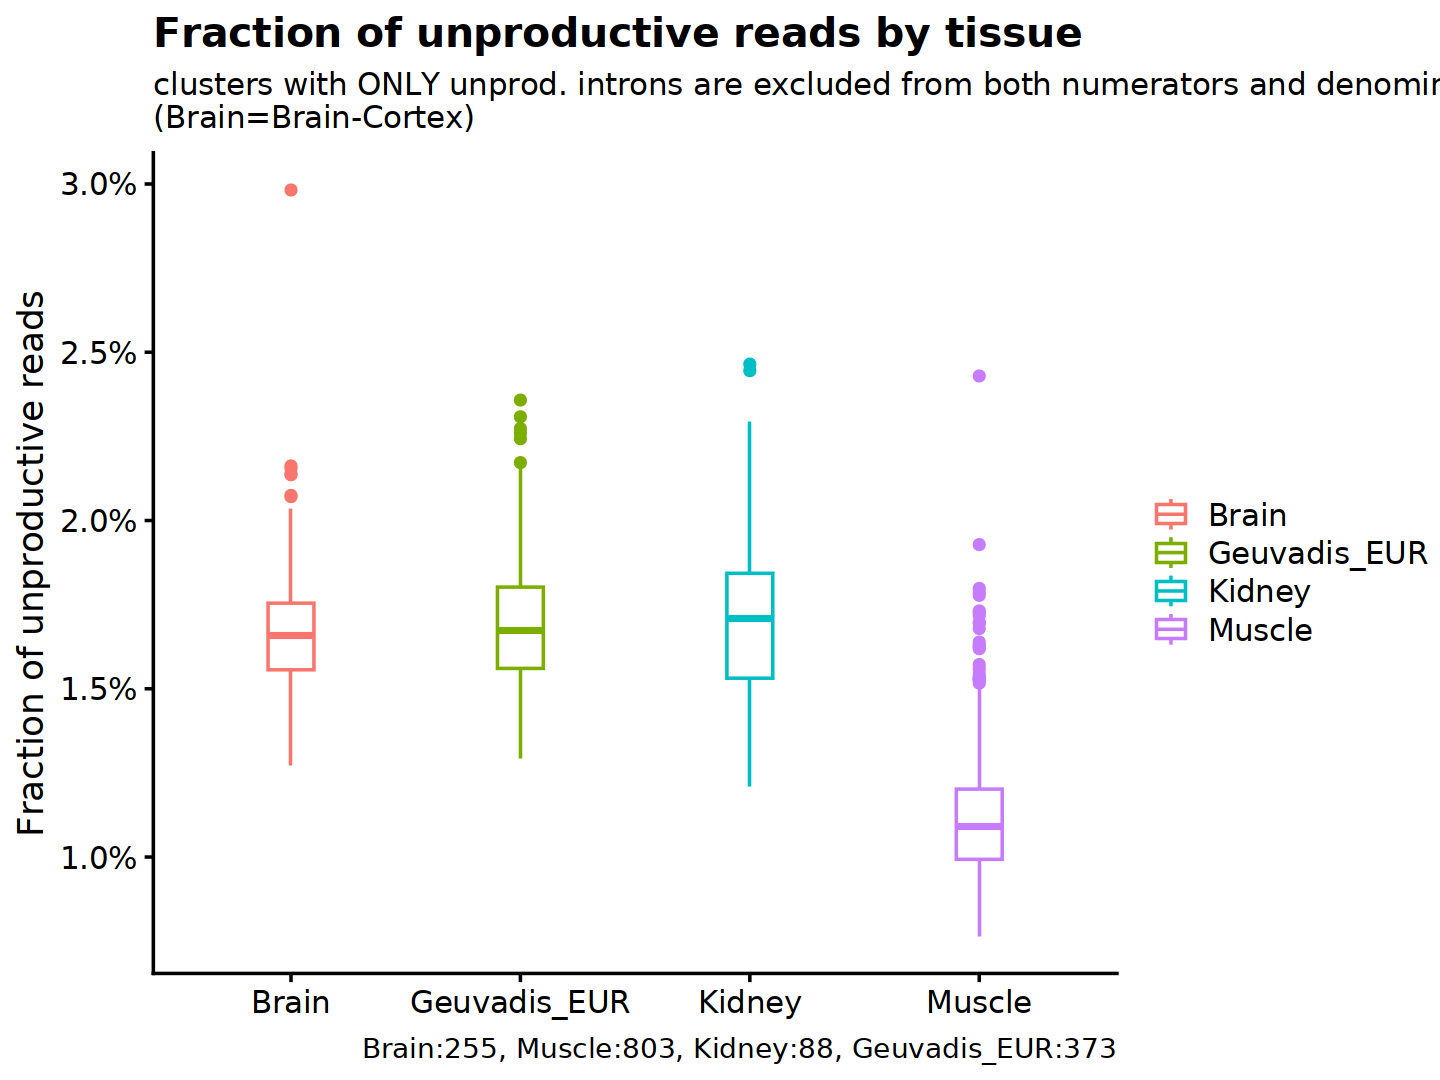

In [79]:
#| label: fig-boxplot-unprod-ratios
#| fig-cap: "Fraction of unproductive reads by tissue"
#| include: true

dt_summary %>% 
    ggplot() + geom_boxplot(aes(x = ds, y = frac_unprod, col = ds), width = .2) +
        scale_y_continuous(labels = scales::percent_format(accuracy = .1)) +
        labs(x = NULL, y = "Fraction of unproductive reads", title = "Fraction of unproductive reads by tissue",
             subtitle = "clusters with ONLY unprod. introns are excluded from both numerators and denominators.\n(Brain=Brain-Cortex)",
            caption = (dt_summary[, .N, by = ds] %>% deframe() %>% imap_chr(~glue("{.y}:{.x}")) %>% paste(collapse = ", ")),
             color = NULL
            )

In [61]:
dt_summary[, .N, by = ds] %>% deframe()

Brain Muscle Kidney 
   255    803     88

In [72]:
dt_summary[, .N, by = ds] %>% deframe() %>% imap_chr(~glue("{.y}:{.x}")) %>% paste(collapse = ", ")

[1] "Brain:255, Muscle:803, Kidney:88"